--- Exploratory analysis of the data --- 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport

random_state=20181126

In [3]:
rev_df = pd.read_csv('consumer_reviews_amazon_products.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rev_df.shape

(34660, 21)

In [5]:
rev_df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [6]:
rev_df.head(20)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

---Preliminary assessment of the data showed that we can remove a number of columns that are not useful for the purpose of our project. We will clean our data.---

In [7]:
#Removing columns
rev_df = rev_df.drop(columns=['reviews.userCity', 'reviews.userProvince','reviews.sourceURLs','reviews.didPurchase','asins'])

In [8]:
rev_df.columns

Index(['id', 'name', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username'],
      dtype='object')

In [9]:
#Renaming our columns for the purpose of convenience
rev_df = rev_df.rename(columns={'id': 'ID', 'name' : 'NAME', 'asin' : 'ASIN', 'brand' : 'BRAND', 'categories' : 'CATEGORIES', 'keys' : 'KEYS', 'manufacturer' : 'MANUFACTURER', 'reviews.date' : 'RDATE', 'reviews.dateAdded' : 'RDATEADDED', 'reviews.dateSeen' : 'RDATESEEN', 'reviews.doRecommend' : 'RDORECOMMEND', 'reviews.id' : 'RID', 'reviews.numHelpful' : 'RNUMHELPFUL', 'reviews.rating'  : 'RRATING', 'reviews.text' : 'RTEXT', 'reviews.title' : 'RTITLE', 'reviews.username' : 'RUSERNAME' })

In [10]:
rev_df.columns


Index(['ID', 'NAME', 'BRAND', 'CATEGORIES', 'KEYS', 'MANUFACTURER', 'RDATE',
       'RDATEADDED', 'RDATESEEN', 'RDORECOMMEND', 'RID', 'RNUMHELPFUL',
       'RRATING', 'RTEXT', 'RTITLE', 'RUSERNAME'],
      dtype='object')

In [11]:
# Let's check datatypes of our data
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 16 columns):
ID              34660 non-null object
NAME            27900 non-null object
BRAND           34660 non-null object
CATEGORIES      34660 non-null object
KEYS            34660 non-null object
MANUFACTURER    34660 non-null object
RDATE           34621 non-null object
RDATEADDED      24039 non-null object
RDATESEEN       34660 non-null object
RDORECOMMEND    34066 non-null object
RID             1 non-null float64
RNUMHELPFUL     34131 non-null float64
RRATING         34627 non-null float64
RTEXT           34659 non-null object
RTITLE          34655 non-null object
RUSERNAME       34658 non-null object
dtypes: float64(3), object(13)
memory usage: 4.2+ MB


In [12]:
rev_df.describe()

,RID,RNUMHELPFUL,RRATING
count,1.0,34131.000000,34627.000000
mean,111372787.0,0.630248,4.584573
std,NaN,13.215775,0.735653
min,111372787.0,0.000000,1.000000
25%,111372787.0,0.000000,4.000000
50%,111372787.0,0.000000,5.000000
75%,111372787.0,0.000000,5.000000
max,111372787.0,814.000000,5.000000


In [13]:
pd.set_option('display.max_colwidth', -1)

In [14]:
condition = rev_df['RRATING'] >= 4.0
rating_df = rev_df[condition]

In [15]:
def mention_quantity():
    features = ['screen', 'sound', 'camera', 'battery', 'RAM', 'storage', 'color']
    mentions = [0,0,0,0,0,0,0]
    for i in range(len(features)):
        temp = rating_df.RTEXT.str.count(features[i]).sum()
        mentions[i] = temp
    return mentions
print(mention_quantity())

[1975.0, 1161.0, 395.0, 1018.0, 18.0, 358.0, 348.0]


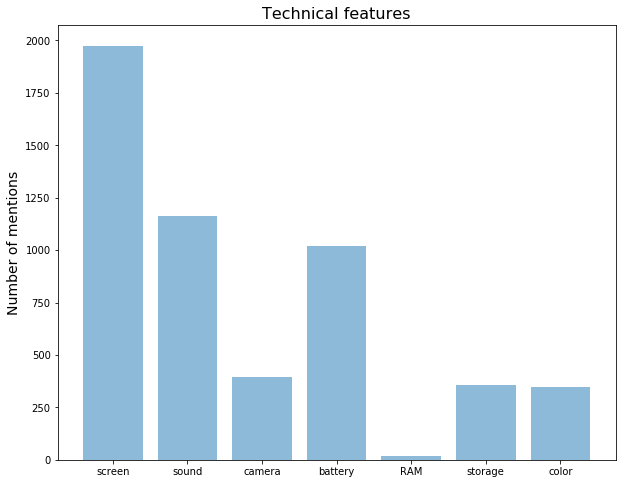

In [17]:
features = ['screen', 'sound', 'camera', 'battery', 'RAM', 'storage', 'color']
plt.figure(figsize=(10,8))
y_pos = np.arange(len(features))
_ = plt.bar(y_pos, mention_quantity(), align='center', alpha=0.5)
_ = plt.xticks(y_pos, features)
plt.ylabel('Number of mentions',fontsize=14)
plt.title('Technical features', fontsize=16)


plt.show()

In [18]:
#Adding a new column for labels.

rev_classifier_df = rev_df
rev_classifier_df['LABEL'] = np.where(rev_df['RRATING']<4.0, 'negative', 'positive')


In [26]:
#Removed columns that are not necessary for the classification.
rev_classifier_df = rev_df.drop(columns=['RID','ID','CATEGORIES', 'KEYS', 'MANUFACTURER', 'RDATE', 'RDATEADDED', 'RDATESEEN', 'RDORECOMMEND', 'RNUMHELPFUL', 'RTITLE', 'RUSERNAME', 'NAME', 'BRAND', 'RRATING'])

In [29]:
rev_classifier_df = rev_classifier_df.dropna()

In [30]:
rev_classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34659 entries, 0 to 34659
Data columns (total 2 columns):
RTEXT    34659 non-null object
LABEL    34659 non-null object
dtypes: object(2)
memory usage: 812.3+ KB


In [32]:
#Split data

x_train, x_test, y_train, y_test = train_test_split(rev_classifier_df['RTEXT'], rev_classifier_df['LABEL'], test_size=0.1, random_state=random_state)

train_df = pd.DataFrame(x_train, columns=['RTEXT'])
train_df['LABEL'] = y_train

test_df = pd.DataFrame(x_test, columns=['RTEXT'])
test_df['LABEL'] = y_test

train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

print(train_df.shape[0], np.mean((train_df.LABEL=='positive')*1))
print(test_df.shape[0], np.mean((test_df.LABEL=='positive')*1))

31193 0.9325810277946975
3466 0.9399884593190998


In [33]:
def vectorize_text(rev_classifier_df, n_features=1000, max_df=0.50, min_df=100):
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, max_features=n_features, stop_words='english')
    X=(vectorizer.fit_transform(rev_classifier_df.RTEXT)>0)*1
    Y=(rev_classifier_df.LABEL=='positive')*1
    
    return X,Y, vectorizer
    
    

In [34]:
#Cross Validation

k_fold = KFold(n_splits=5, random_state=random_state)

In [35]:
def cv_results(rev_classifier_df, n_features=1000, max_df=0.80, min_df=50):
    nbayes = BernoulliNB()
    X, Y, _= vectorize_text(rev_classifier_df, n_features, max_df, min_df)
    
    results = []
    
    for train, test in k_fold.split(X):
        nbayes.fit(X[train, :], Y[train])
        y_predicted = nbayes.predict(X[test, :])
        accuracy= accuracy_score(Y[test], y_predicted)
        results.append(accuracy)
        
    return np.mean(results), np.std(results)

In [36]:
cv_results(train_df)

(0.9006505890893782, 0.00391211774177043)

In [38]:
#Train model

X,Y, vectorizer = vectorize_text(train_df, n_features=100)
nbayes = BernoulliNB()
nbayes.fit(X,Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
X_test = vectorizer.transform(test_df.RTEXT)
Y_test = (test_df.LABEL=='positive')*1

y_predicted = nbayes.predict(X_test)
y_probpos = nbayes.predict_proba(X_test)[:,1]

print(X_test.shape)

(3466, 100)


In [44]:

np.random.seed(random_state + 0)
for i in np.random.choice(test_df.index.values, 4):
    print('Index:             %i' % i)
    print('Prob. Positive:    %0.3f' % nbayes.predict_proba(X_test[i])[0][1])
    print('Label:             %s\n' % test_df.LABEL.values[i])
    print(test_df.RTEXT.values[i], '\n\n')

Index:             1059
Prob. Positive:    0.940
Label:             positive

Solid product, great speaker, but another device to help you consume media and spend money. Alexa order me stuff! 


Index:             1023
Prob. Positive:    0.989
Label:             positive

All I wanted was a Kindle to read books. I got this instead!! Excellent choice because I can read books and do so much more!! 


Index:             878
Prob. Positive:    0.882
Label:             positive

Amazon fire tv is the best to use with kodi app that allows you to have all the movies without any additional charge. 


Index:             2841
Prob. Positive:    0.937
Label:             positive

I wasn't sure how we would like the tap, but I must say it has been fun talking to Alexa. I like asking her to tell me a joke, play my favorite radio station or play music. The fun continues as I add apps and Alexa expands her knowledge base. 




In [53]:
#Performance of the sample
def performance(classifier):
    y_predicted = classifier.predict(X_test)
    print('No. of test samples:         %i' % len(y_predicted))
    print('Accuracy:                    %0.1f%%' % (accuracy_score(Y_test, y_predicted)*100))
    print('Precision:                   %0.1f%%' % (precision_score(Y_test, y_predicted)*100))
    print('Recall:                      %0.1f%%' % (recall_score(Y_test, y_predicted)*100))
    
performance(nbayes)

No. of test samples:         3466
Accuracy:                    93.3%
Precision:                   94.6%
Recall:                      98.5%


In [43]:
#False Positives 

np.random.seed(random_state + 0)
for i in np.random.choice(test_df.loc[(Y_test==0) & (y_predicted==1)].index.values, 4):
    print('Index:                  %i' % i)
    print('Prob. Positive:         %0.3f' % y_probpos[i])
    print('True Label:             %s\n' % test_df.LABEL.values[i])
    print(test_df.RTEXT.values[i], '\n\n')

Index:                  620
Prob. Positive:         0.789
True Label:             negative

this is a great pad device, big and good display. just you have to familiar with the amazon OS and they build it for E-book, so it will a little bit slow for even web site surfing.more serious in game playing. 


Index:                  2049
Prob. Positive:         0.790
True Label:             negative

Not very user friendly. A bit slow & heavy. Burned out pixel right out of box. Noticeable but not bothersome. Still like my iPad after trying fire. 


Index:                  502
Prob. Positive:         0.938
True Label:             negative

Great tablet but after about a year it starts acting up and you cannot get help from Amazon to fix it. 


Index:                  2777
Prob. Positive:         0.954
True Label:             negative

I bought this product to gift to a 8year old kid and she loved it. she plays games, puzzles. 




In [45]:
#False Negatives

np.random.seed(random_state + 0)
for i in np.random.choice(test_df.loc[(Y_test==1) & (y_predicted==0)].index.values, 4):
    print('Index:                  %i' % i)
    print('Prob. Positive:         %0.3f' % nbayes.predict_proba(X_test[i])[0][1])
    print('True Label:             %s\n' % test_df.LABEL.values[i])
    print(test_df.RTEXT.values[i], '\n\n')

Index:                  2919
Prob. Positive:         0.460
True Label:             positive

This is not going to compare to a galaxy tab or iPad but it's a good starter tablet for my nephew. I hate the ads that pop up on the screen and wish Amazon would have mentioned that. 


Index:                  3320
Prob. Positive:         0.433
True Label:             positive

This tablet does everything that we need it to do. The screen looks really good and it doesn't seem to be under powered. The expandable storage feature is awesome if you want to store music and movies on it. The only thing that is a negative is the limited selection of apps for it. I knew about it before I bought it and it hasn't been an issue yet. 


Index:                  1898
Prob. Positive:         0.074
True Label:             positive

I think this is a great product/ solution, especially for the price. I needed to replace my portable DVD player. I have 2 young kids and still wanted something to play movies on the

In [46]:
#Borderline Cases

np.random.seed(random_state + 0)

border_threshold = 0.05
borderline = ((y_probpos>(0.5-border_threshold)) & (y_probpos<(0.5+border_threshold)))

print('No. on border:        %i' % sum(borderline), '\n')

for i in np.random.choice(test_df.loc[borderline].index.values, 4):
    print('Index:            %i' % i)
    print('Prob. Positive:   %0.3f' % nbayes.predict_proba(X_test[i])[0][1])
    print('True Label:       %s\n' % test_df.LABEL.values[i])
    print(test_df.RTEXT.values[i], '\n\n')

No. on border:        32 

Index:            397
Prob. Positive:   0.472
True Label:       positive

This was a good pick for first kids tablets. I just wish getting to their apps was a little easier 


Index:            3286
Prob. Positive:   0.497
True Label:       positive

I purchased a Amazon - Fire - 7 Tablet for my husband who has never used one. It was easy to set up .To help him get started, I moved the apps that he wanted to use to the top of the screen. In no time he was taking and storing his pictures and searching the internet.. The only thing we wish it would do better is turn on faster. 


Index:            1374
Prob. Positive:   0.525
True Label:       positive

I bought my Fire HD just for reading. I have a Kindle Unlimited membership and wanted to keep all my books in one place. This is an amazing little tablet. How Amazon can sell these for only $89 is beyond me. And I got mine on Black Friday, so it was only $59! At that price it was a downright steal. I had the fir

In [48]:
# Comparing performance of our method(Naive Bayes) with Logistic Regression (another method of classification).

logistic_regression = LogisticRegression(random_state=random_state, solver='lbfgs')

logistic_regression.fit(X,Y)
performance(logistic_regression)

No. of test samples:         3466
Accuracy:                    94.0%
Precision:                   94.4%
Recall:                      99.6%


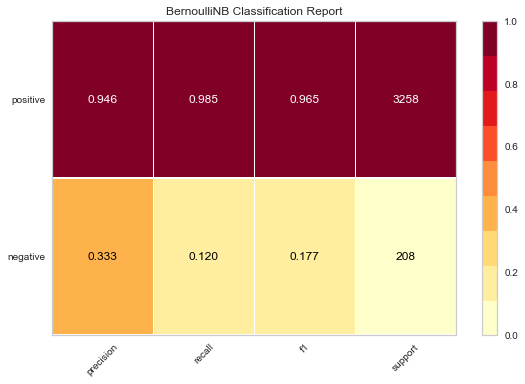

In [50]:
visualizer = ClassificationReport(nbayes, classes=['negative', 'positive'], support=True)
visualizer.fit(X,Y)
visualizer.score(X_test,Y_test)
g = visualizer.poof()

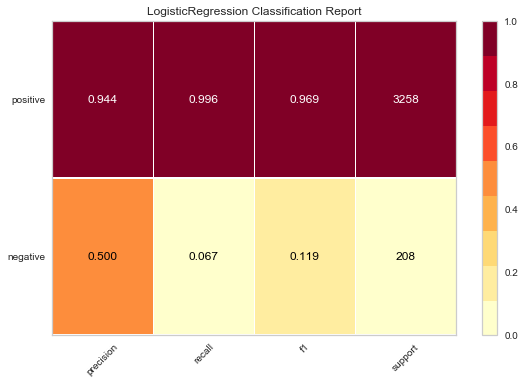

In [52]:
visualizer = ClassificationReport(logistic_regression, classes=['negative', 'positive'], support=True)
visualizer.fit(X,Y)
visualizer.score(X_test, Y_test)
g = visualizer.poof()